# **Development of Image Classification Model for (Fruits, Vegetables and Flowers) using Transfer Learning**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/community/en/flowers_tf_lite.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
import tensorflow as tf
import pandas as pd
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.2.0'

## **Setting Up Input Connection To Kaggle**

In [ ]:
#Install the Kaggle package if it hasn't been installed on your colab before.
#!pip install kaggle

**Import API file token**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tobiek","key":"1fa0910bd02b226ef909b961620fa04a"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

**Insert kaggle API command for green finder dataset**

In [ ]:
!kaggle datasets download -d tobiek/green-finder

100% 617M/618M [00:06<00:00, 94.5MB/s]
100% 618M/618M [00:06<00:00, 98.6MB/s]


In [ ]:
!ls

green-finder.zip  kaggle.json  sample_data


**Unzip the kaggle file**

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('green-finder.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

# Alternative UnZip Method

#!unzip \*.zip && rm *.zip 

## **Setup Input Pipeline**
Delete the .txt files from Colab Files before running this code

In [ ]:
PATH = "/content/files/Fruit_Flower_Veg"

import shutil
shutil.rmtree('/content/files/Fruit_Flower_Veg/.ipynb_checkpoints', ignore_errors=True)

dirs = os.listdir(PATH)
for file in dirs:
  print (file)


Tomato Cherry Maroon
Peach Flat
Redcurrant
Potato Red
Grapefruit Pink
Pepper Red
Quince
Pepino
Kiwi
Raspberry
Pepper Yellow
Grapefruit White
Pear Red
Roses
Apple Red
Pear Kaiser
Fig
Beetroot
Star fruit or Carambola
Cherry Black
Papaya
Potato Sweet
Daisy
Cucumber Ripe
Onion White
Cantaloupe
Dandelion
Tomato Green Unripe
Granadilla
Tamarillo
Grape White
Pecan Nut
Huckleberry
Pear Forelle
Hazelnut
Physalis or Gooseberry with Husk
Onion Red
Pomelo Sweetie
Rambutan
Avocado
Mango Red
Nectarine
Walnut
Dates
Orange
Lemon Meyer
Ginger Root
Apple Red Delicious
Apple Golden
Apple Golden Rotten
Cauliflower
Lemon
Apple Granny Smith
Maracuja
Plum
Pear Stone
Tomato Cherry Yellow
Pepper Green
Kumquats
Pomegranate
Salak
Pear Williams
Grape Pink
Mango
Pear
Kaki
Banana Lady Finger
Mandarine
Pear Abate
Passion Fruit
Cactus fruit
Apple Crimson Snow
Strawberry
Eggplant
Grape Blue
Sunflowers
Pepper Orange
Tomato Beefsteak
Pineapple Mini
Cherry Yellow
Blueberry
Banana
Guava
Tulips
Corn or Maize
Pitahaya Red
L

**Dataset Summary**

In [ ]:
from pathlib import Path

ds = len(dirs)
data_dir = Path(PATH)
image_count = len(list(data_dir.glob('*/*.jpg')))
print("There are a total of " + str(image_count) +
      " Images and " + str(ds) + " Classes in this dataset.")


There are a total of 94045 Images and 116 Classes in this dataset.


# **Preparing the data**

Use **`ImageDataGenerator`** to rescale the images.

*   Create the train generator and specify where the train dataset directory, image size, batch size.
*   Create the validation generator with similar approach as the train generator with the flow_from_directory() method.

**PLEASE NOTE:**
*   Image Size for **MobileNetV2** = (224, 224, 3)
*   Image Size for **InceptionV3** = (299, 299, 3)
*   Image Size for **VGG19** = (224, 224, 3)



In [ ]:
IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    seed=120,
    subset='training')

val_generator = datagen.flow_from_directory(
    PATH,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    seed=120,
    subset='validation')

Found 75274 images belonging to 116 classes.
Found 18771 images belonging to 116 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 116))

**Save the labels in a file which will be downloaded later.**

In [ ]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
  f.write(labels)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden': 2, 'Apple Golden Rotten': 3, 'Apple Granny Smith': 4, 'Apple Pink Lady': 5, 'Apple Red': 6, 'Apple Red Delicious': 7, 'Apple Red Yellow': 8, 'Apricot': 9, 'Avocado': 10, 'Avocado ripe': 11, 'Banana': 12, 'Banana Lady Finger': 13, 'Banana Red': 14, 'Beetroot': 15, 'Blueberry': 16, 'Cactus fruit': 17, 'Cantaloupe': 18, 'Cauliflower': 19, 'Cherry Black': 20, 'Cherry Rainier': 21, 'Cherry Red': 22, 'Cherry Yellow': 23, 'Chestnut': 24, 'Clementine': 25, 'Coconut': 26, 'Corn or Maize': 27, 'Corn or Maize Husk': 28, 'Cucumber Ripe': 29, 'Daisy': 30, 'Dandelion': 31, 'Dates': 32, 'Eggplant': 33, 'Fig': 34, 'Forest Nut': 35, 'Ginger Root': 36, 'Granadilla': 37, 'Grape Blue': 38, 'Grape Green': 39, 'Grape Pink': 40, 'Grape White': 41, 'Grapefruit Pink': 42, 'Grapefruit White': 43, 'Guava': 44, 'Hazelnut': 45, 'Huckleberry': 46, 'Kaki': 47, 'Kiwi': 48, 'Kohlrabi': 49, 'Kumquats': 50, 'Lemon': 51, 'Lemon Meyer': 52, 'Limes': 53, 'Lyche

In [ ]:
!cat labels.txt

## **Create the base model from the pre-trained convnets**

Create the base model from either **MobileNet V2, Inception V3 or VGG19** model developed at Google, and pre-trained on the ImageNet dataset.

First, pick which intermediate layer of the model will be used for feature extraction. A common practice is to use the output of the very last layer before the flatten operation, the so-called "bottleneck layer". The reasoning here is that the following fully-connected layers will be too specialized to the task the network was trained on, and thus the features learned by these layers won't be very useful for a new task. The bottleneck features, however, retain much generality.

Let's instantiate an MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the `include_top=False` argument, we load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained model of your choice

MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
InceptionV3_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
VGG19_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
MODEL_SELECTION = (MobileNetV2_model) #@param ["(MobileNetV2_model)", "(InceptionV3_model)", "(VGG19_model)"] {type:"raw", allow-input: true}

base_model = MODEL_SELECTION
print("\n Your selected Model has an input size of {} ".format(IMG_SHAPE))

80142336/80134624 [==============================] - 1s 0us/step

 Your selected Model has an input size of (224, 224, 3) 


## **Feature extraction**

Freeze the convolutional base created from the previous step and use that as a feature extractor, add a classifier on top of it and train the top-level classifier.

In [ ]:
base_model.trainable = False

**Add a classification head**

In [ ]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(116, activation='softmax')
])

**Compile the model**

You must compile the model before training it.  Since there are multiple classes, use a categorical cross-entropy loss.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 116)               3828      
Total params: 2,630,484
Trainable params: 372,500
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 4


**Train the model**

<!-- TODO(markdaoust): delete steps_per_epoch in TensorFlow r1.14/r2.0 -->

In [ ]:
epochs = 10

history = model.fit(train_generator, 
                    steps_per_epoch=len(train_generator), 
                    epochs=epochs, 
                    validation_data=val_generator, 
                    validation_steps=len(val_generator))

Epoch 1/10
2353/2353 [==============================] - 377s 160ms/step - loss: 1.3629 - accuracy: 0.6351 - val_loss: 0.5307 - val_accuracy: 0.8387
Epoch 2/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.3537 - accuracy: 0.8912 - val_loss: 0.4199 - val_accuracy: 0.8738
Epoch 3/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.2195 - accuracy: 0.9320 - val_loss: 0.4031 - val_accuracy: 0.8789
Epoch 4/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.1626 - accuracy: 0.9487 - val_loss: 0.4485 - val_accuracy: 0.8759
Epoch 5/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.1334 - accuracy: 0.9580 - val_loss: 0.4661 - val_accuracy: 0.8765
Epoch 6/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.1088 - accuracy: 0.9650 - val_loss: 0.3739 - val_accuracy: 0.9037
Epoch 7/10
2353/2353 [==============================] - 374s 159ms/step - loss: 0.0980 - accuracy: 0.9684 - val_

**Plot learning curves of the training and validation accuracy/loss**

Let's take a look at the learning curves of the training and validation accuracy/loss when using the base model as a fixed feature extractor. 

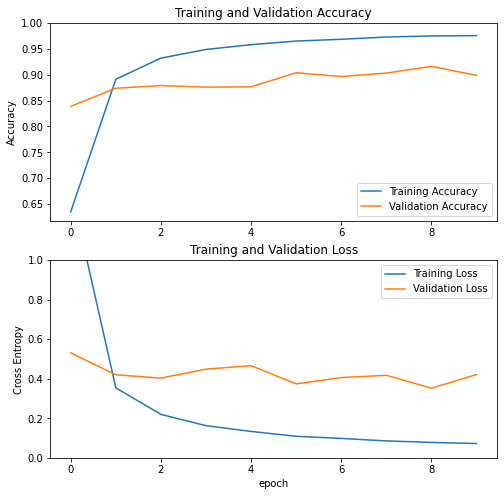

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Fine tuning**
In our feature extraction experiment, you were only training a few layers on top of the base model. The weights of the pre-trained network were **not** updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic features maps to features associated specifically to our dataset.

### **Un-freeze the top layers of the model**


All you need to do is unfreeze the `base_model` and set the bottom layers be un-trainable. Then, recompile the model (necessary for these changes to take effect), and resume training.

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


### **Compile the model**

Compile the model using a much lower training rate.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 116)               3828      
Total params: 2,630,484
Trainable params: 2,235,092
Non-trainable params: 395,392
_________________________________________________________________


In [ ]:
print('Number of trainable variables = {}'.format(len(model.trainable_variables)))

Number of trainable variables = 60


### **Train the model**

In [ ]:
history_fine = model.fit(train_generator, 
                         steps_per_epoch=len(train_generator), 
                         epochs=10, 
                         validation_data=val_generator, 
                         validation_steps=len(val_generator))

Epoch 1/10
2353/2353 [==============================] - 724s 308ms/step - loss: 0.7926 - accuracy: 0.8428 - val_loss: 0.2160 - val_accuracy: 0.9457
Epoch 2/10
2353/2353 [==============================] - 722s 307ms/step - loss: 0.0679 - accuracy: 0.9788 - val_loss: 0.1543 - val_accuracy: 0.9629
Epoch 3/10
2353/2353 [==============================] - 722s 307ms/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.1441 - val_accuracy: 0.9697
Epoch 4/10
2353/2353 [==============================] - 722s 307ms/step - loss: 0.0217 - accuracy: 0.9933 - val_loss: 0.1112 - val_accuracy: 0.9761
Epoch 5/10
2353/2353 [==============================] - 722s 307ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.1046 - val_accuracy: 0.9761
Epoch 6/10
2353/2353 [==============================] - 722s 307ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0965 - val_accuracy: 0.9793
Epoch 7/10
2353/2353 [==============================] - 721s 307ms/step - loss: 0.0097 - accuracy: 0.9972 - val_

**Plot learning curves of the training and validation accuracy/loss**

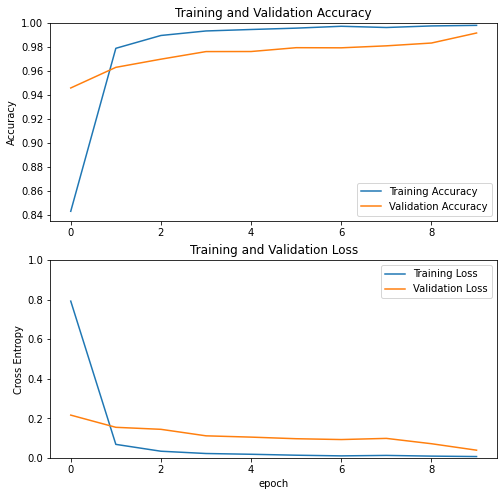

In [ ]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## **Convert to TFLite**

Saved the model using **`tf.saved_model.save`**

In [ ]:
saved_model_dir = 'save/fine_tuning'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

**Post-Training Quantization**

This technique is enabled as an option in the TensorFlow Lite converter to reduce the precision of the numbers in weight and biases in the model.

The simplest form of post-training quantization quantizes weights from floating point to 8-bits of precision. At inference, weights are converted from 8-bits of precision to floating point and computed using floating-point kernels. This conversion is done once and cached to reduce latency.

To further improve latency, hybrid operators dynamically quantize activations to 8-bits and perform computations with 8-bit weights and activations. This optimization provides latencies close to fully fixed-point inference. However, the outputs are still stored using floating point, so that the speedup with hybrid ops is less than a full fixed-point computation.

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

**Convert the saved model to a TF lite compatible format**

In [ ]:
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

**Download the converted model and labels**

In [ ]:
from google.colab import files

files.download('model.tflite')
files.download('labels.txt')

## Summary:

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is common to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the orginial dataset that the pre-trained model was trained on.
